# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- ( ⚆ ω ⚆)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        return ((y - y_pred) ** 2).mean()


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- =^･ω･^=
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        errors = y_pred - y
        return (2 / n_objects) * (np.dot(X.T, errors))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- (ﾉ´ з `)ノ

    w_t = w_init.copy()
    trac = [w_t.copy()]
    for i in range(n_iterations):
      grad = loss.calc_grad(X, y, w_t)
      w_t -= lr * grad
      trac.append(w_t.copy())

    return trac

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
w_init_15 = w_init.copy() #создаю новую переменную w_init, чтобы использовать ее для задания 1.5
w_init_17 = w_init.copy() #создаю новую переменную w_init, чтобы использовать ее для задания 1.7
w_init_18 = w_init.copy() #создаю новую переменную w_init, чтобы использовать ее для задания 1.8

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

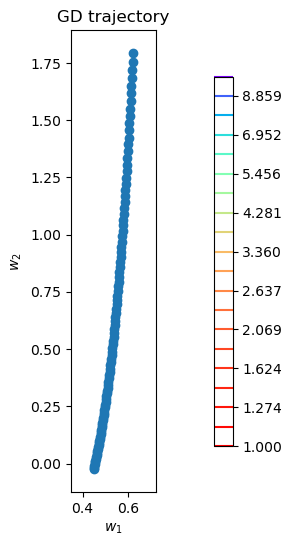

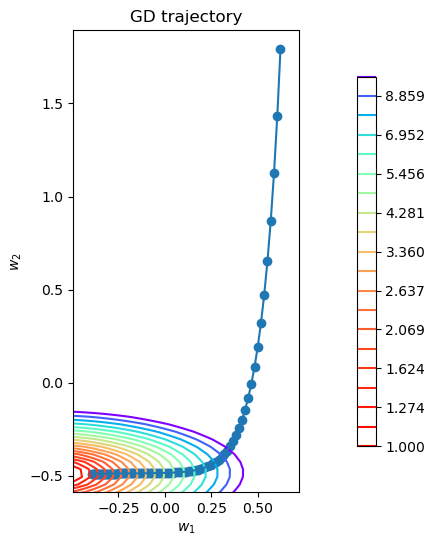

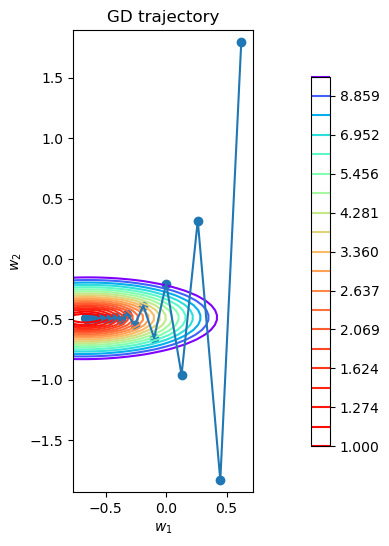

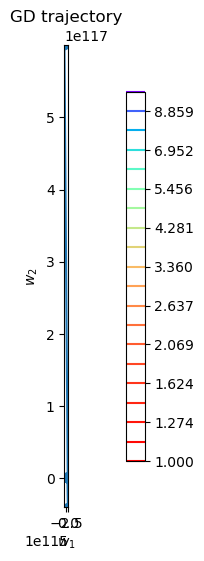

In [9]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶

loss = MSELoss()
lrs = [0.0001, 0.001, 0.01, 0.1]
n_iterations = 100

for lr in lrs:
  trac = gradient_descent(w_init, X, y, loss, lr, n_iterations)
  plot_gd(trac, X, y, loss)


1) При длине шага 0.0001 траектория представляет собой почти прямую линию, а градиентный спуск не дошел до точки минимума за 100 итераций, так как длина шага была очень маленькой.

2) При длине шага 0.001 траектория плавно монотонно убывает, градиентный спуск приближается к минимуму, однако все так же не достигает его.

3) При длине шага 0.01 градиентный спуск сходится к минимуму, траектория "зигзагообразная". Колебания происходят из-за того, что градиент перпендикулярен линиям уровня.

4) При длине шага 0.1 наблюдается взрыв градиента: из-за большой длины шага градиент пропускает минимум и, соответсвенно, не доходит до него.

**Так**, увеличение длины шага увелчиивает скорость сходимости спуска, однако есть риск взрыва градиента (перескок через минимум).

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- (＠_＠)


    w_t = w_init.copy()
    trac = [w_t.copy()]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch_X = X[batch_indices]
      batch_y = y[batch_indices]

      grad = loss.calc_grad(batch_X, batch_y, w_t)
      w_t -= lr * grad
      trac.append(w_t.copy())

    return trac

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Learning rate = 0.0001, Batch size = 1


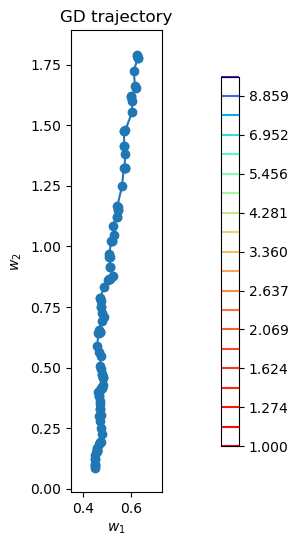

Learning rate = 0.0001, Batch size = 10


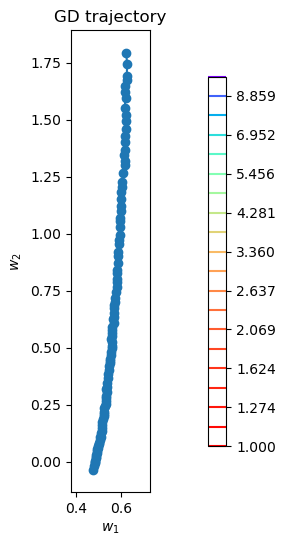

Learning rate = 0.0001, Batch size = 100


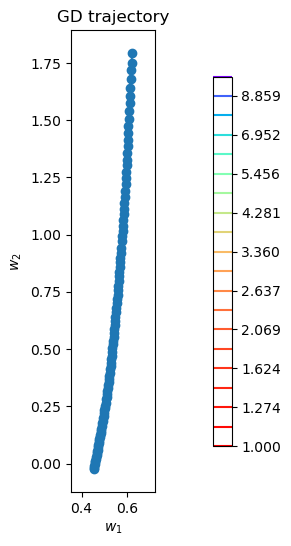

Learning rate = 0.0001, Batch size = 200


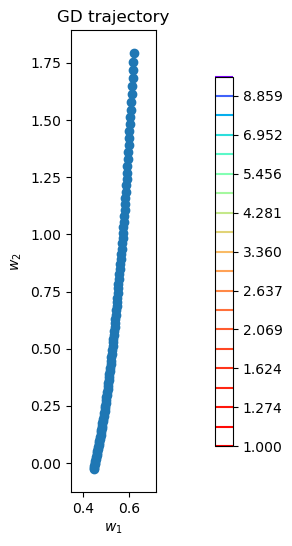

Learning rate = 0.0001, Batch size = 300


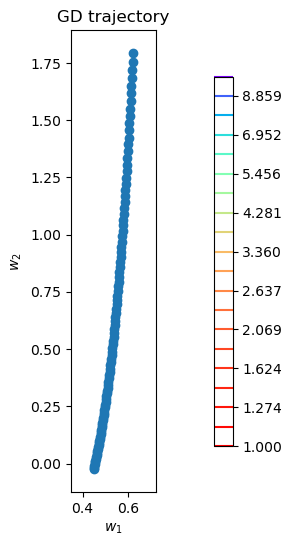

Learning rate = 0.001, Batch size = 1


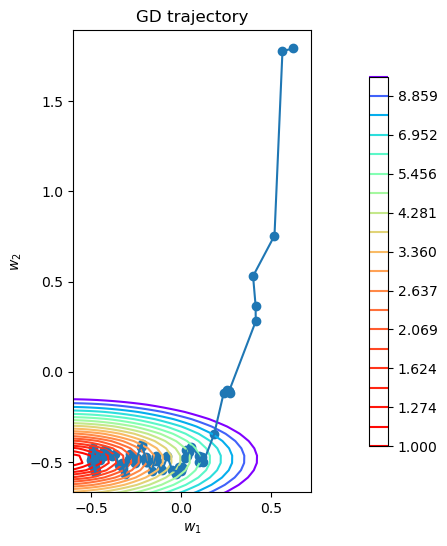

Learning rate = 0.001, Batch size = 10


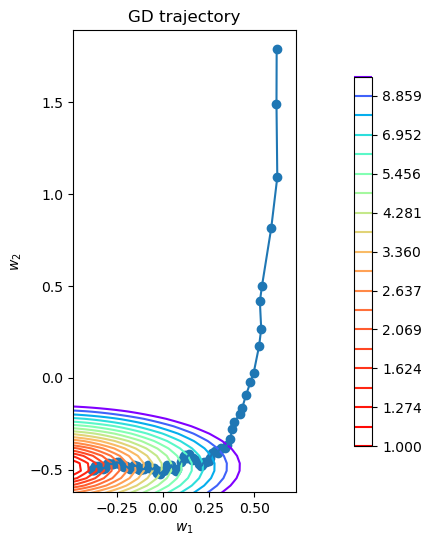

Learning rate = 0.001, Batch size = 100


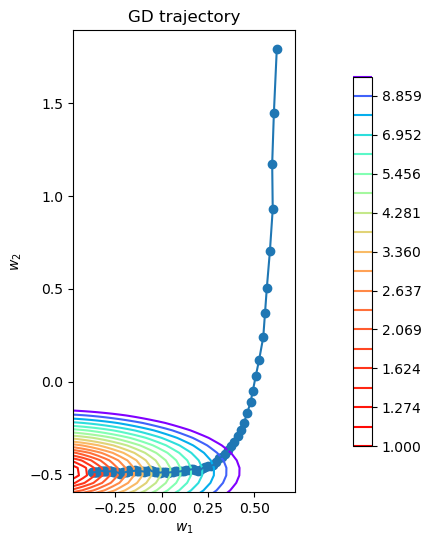

Learning rate = 0.001, Batch size = 200


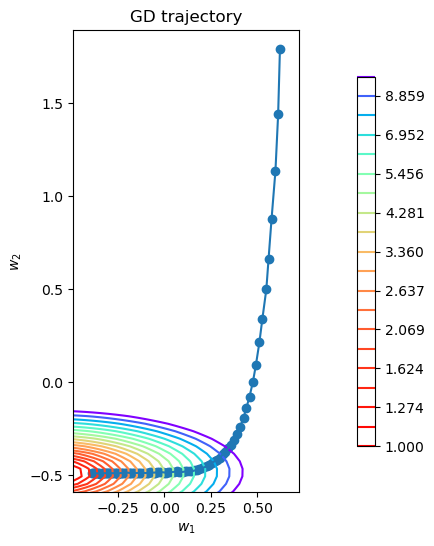

Learning rate = 0.001, Batch size = 300


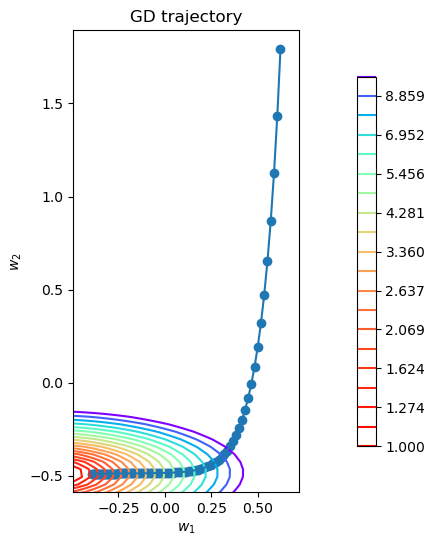

Learning rate = 0.01, Batch size = 1


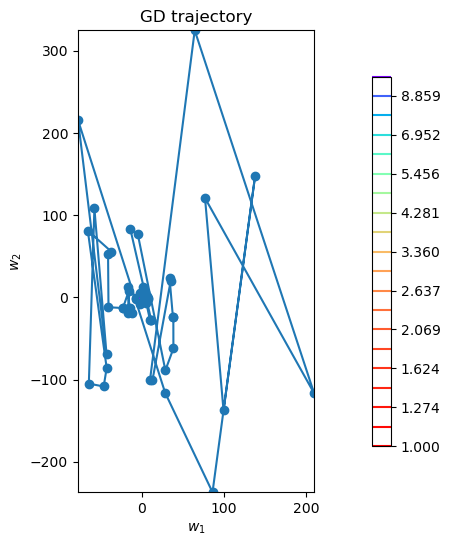

Learning rate = 0.01, Batch size = 10


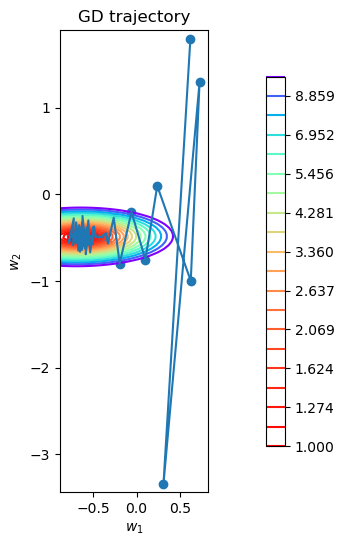

Learning rate = 0.01, Batch size = 100


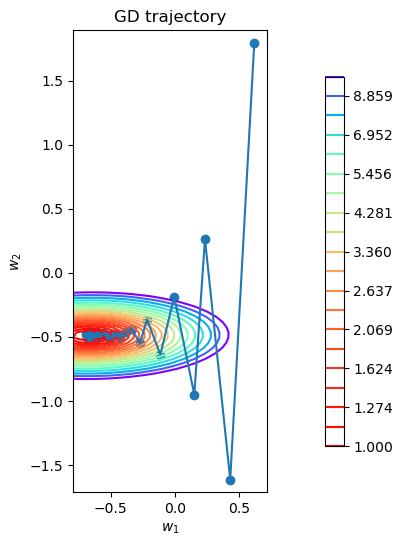

Learning rate = 0.01, Batch size = 200


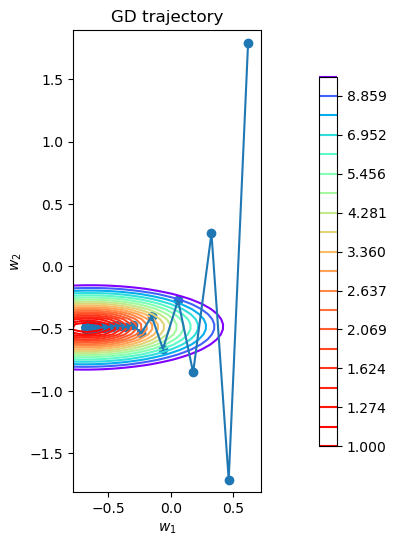

Learning rate = 0.01, Batch size = 300


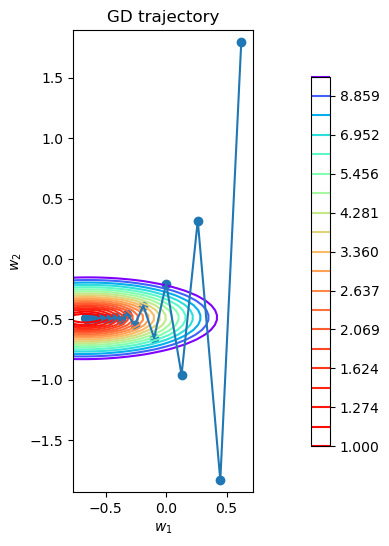

Learning rate = 0.1, Batch size = 1


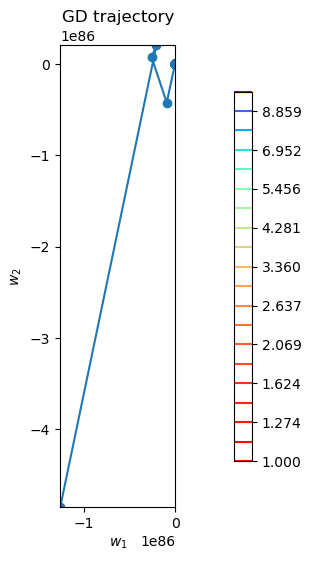

Learning rate = 0.1, Batch size = 10


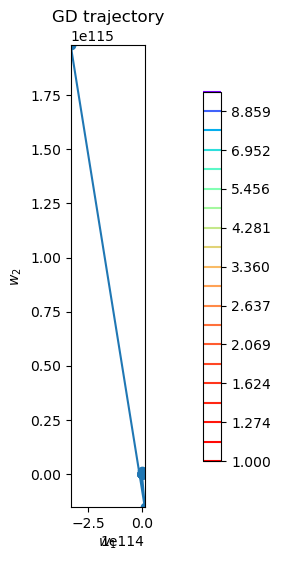

Learning rate = 0.1, Batch size = 100


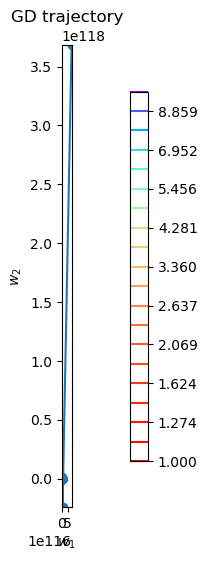

Learning rate = 0.1, Batch size = 200


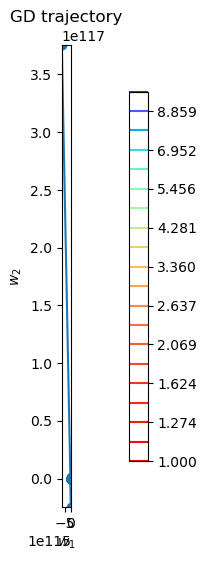

Learning rate = 0.1, Batch size = 300


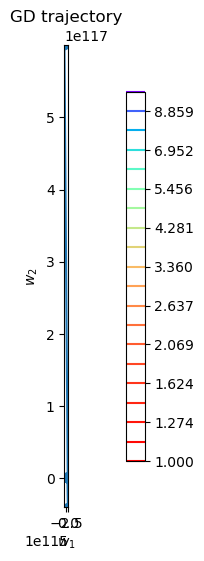

In [11]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶

lrs = [0.0001, 0.001, 0.01, 0.1]
batchs = [1, 10, 100, 200, 300]
n_iterations = 100
loss = MSELoss()


for lr in lrs:
  for bs in batchs:
    print(f'Learning rate = {lr}, Batch size = {bs}')
    trac = stochastic_gradient_descent(w_init_15, X, y, loss, lr, bs, n_iterations)
    plot_gd(trac, X, y, loss)

1) При слишком маленькой длине шага (0.0001) градиентный спуск осуществляется медленно и не сходится к минимуму. Так как шаг маленький, то при любом размере подвыборки (batch_size) траектория выглядит плавным, без колебаний.

2) При длине шага 0.001 стохастический градиентный спуск на этот раз сходится к минимуму (в отличие от обычного). И чем больше размер подвыборки, тем более плавной становится траектория списка.

3) При большой длине шага (например, 0.01) тракетория спуска нестабильна, с большим количеством колебаний. Однако увеличение batch_size делает траекторию менее хаотичной.

4) При слишком большой длине шага (0.1) опять наблюдается взрыв градиента.

**Так**, стохастический спуск осуществляется быстрее обычного, но его траектория более хаотичная. Увеличение длины шага увелчиивает скорость сходимости спуска, однако есть риск взрыва градиента (перескок через минимум). Увеличение размера подвыборки делает траекторию более плавной, но уменьшает скорость сходимости спуска, так как приходится обрабатывать большее количество данных. При больших значениях batch_size стохастический градиентный спуск ведет себя практически так же, как обычный.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- ¯\_(ツ)_/¯

    w_t = w_init.copy()
    trac = [w_t.copy()]

    for i in range(n_iterations):
      nt = lr * ((1 / (1 + i)) ** p)

      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch_X = X[batch_indices]
      batch_y = y[batch_indices]

      grad = loss.calc_grad(batch_X, batch_y, w_t)

      w_t -= nt * grad
      trac.append(w_t.copy())

    return trac

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

p = 0.1


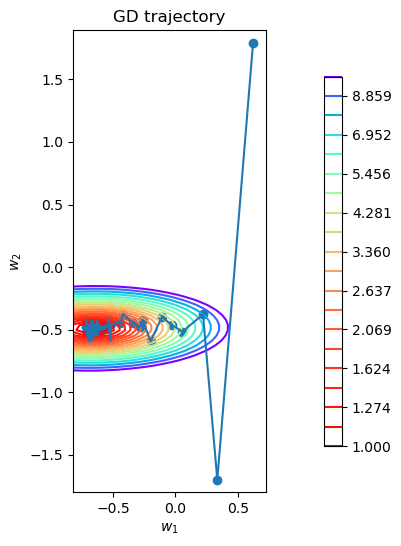

p = 0.3


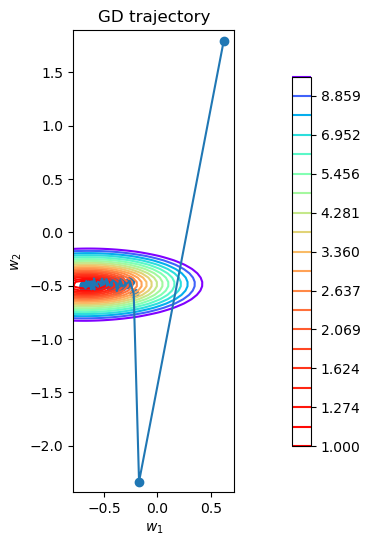

p = 0.6


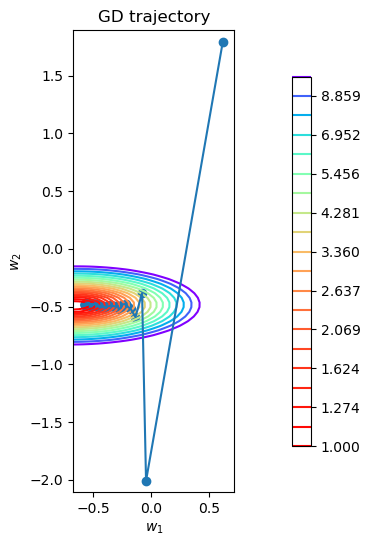

p = 0.8


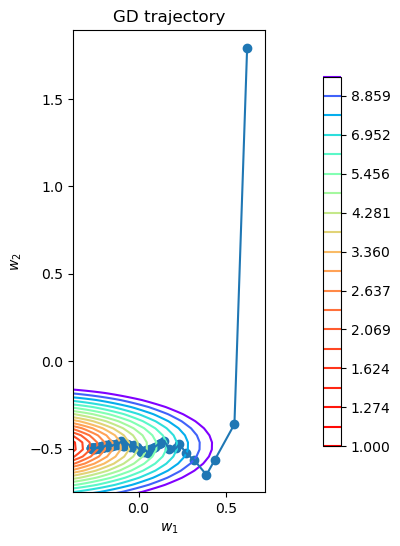

p = 1


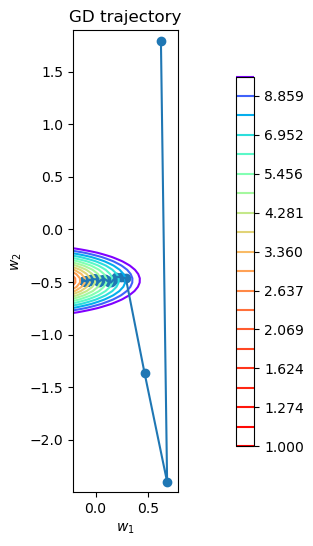

In [13]:
# -- YOUR CODE HERE -- [✖‿✖]

lr = 0.01
batch_size = 10
n_iterations = 100
ps = [0.1, 0.3, 0.6, 0.8, 1]
loss = MSELoss()

for p in ps:
  trac = stochastic_gradient_descent(w_init_17, X, y, loss, lr, batch_size, p, n_iterations)
  print('p =', p)
  plot_gd(trac, X, y, loss)

При небольших значениях p длина шага уменьшается медленнее, траектория спуска содержит больше колебаний. При больших значениях p длина шага уменьшается быстрее и спуск быстрее сходится к минимуму, однако из-за того что шаг сразу становится маленьким, спуск может сойтись преждевременно и пропустить глобальный минимум.


**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

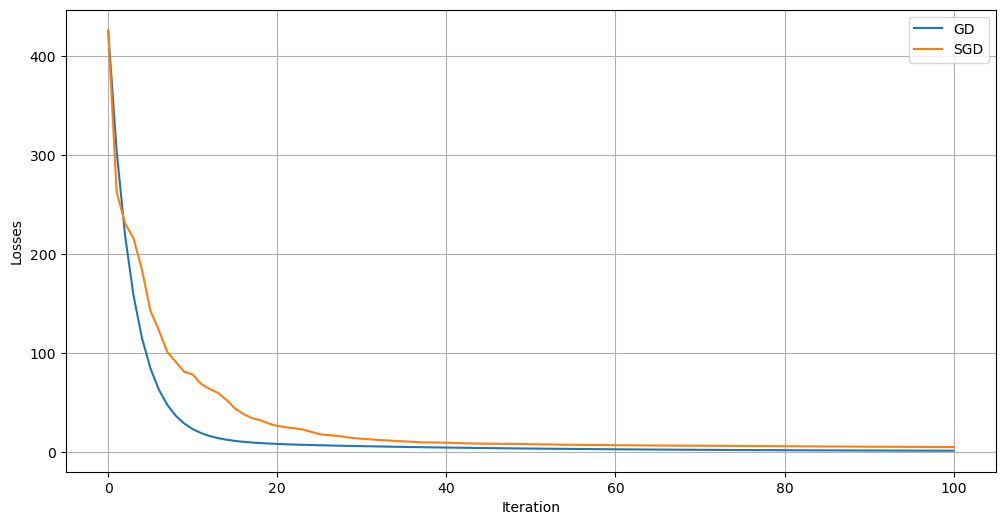

In [14]:
# -- YOUR CODE HERE -- ┌(ಠ_ಠ)┘

lr = 0.001
batch_size = 10
n_iterations = 100
p = 0.3
loss = MSELoss()

gd_trac = gradient_descent(w_init_18, X, y, loss, lr, n_iterations)
gd_losses = list(map(lambda w: loss.calc_loss(X, y, w), gd_trac))

sgd_trac = stochastic_gradient_descent(w_init_18, X, y, loss, lr, batch_size, p, n_iterations)
sgd_losses = list(map(lambda w: loss.calc_loss(X, y, w), sgd_trac))


plt.figure(figsize=(12, 6))
plt.plot(gd_losses, label='GD')
plt.plot(sgd_losses, label='SGD')

plt.xlabel('Iteration')
plt.ylabel('Losses')

plt.legend()
plt.grid()
plt.show()

На графике явно не видно преимущества SGD, так как у GD более низкие значения функции потерь, чем у SGD при всех итерациях.

SGD может побороть проблему нескольких минимумов: график SGD колеблется при 0-20 итерациях, в то время как график GD плавный. Однако на данном графике графике колебания выражены слабо, поэтому не явного преимущества SGD не видно.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ʕ•ᴥ•ʔ

        w_init = np.zeros(X.shape[1])
        trac = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=1000)
        self.w = trac[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [19]:
# -- YOUR CODE HERE -- =^･ω･^=

**1) Заполним пропуски:**

In [20]:
X_raw.shape

(201, 25)

In [21]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       201 non-null    int64  
 1   2       164 non-null    float64
 2   3       201 non-null    object 
 3   4       201 non-null    object 
 4   5       201 non-null    object 
 5   6       199 non-null    object 
 6   7       201 non-null    object 
 7   8       201 non-null    object 
 8   9       201 non-null    object 
 9   10      201 non-null    float64
 10  11      201 non-null    float64
 11  12      201 non-null    float64
 12  13      201 non-null    float64
 13  14      201 non-null    int64  
 14  15      201 non-null    object 
 15  16      201 non-null    object 
 16  17      201 non-null    int64  
 17  18      201 non-null    object 
 18  19      197 non-null    float64
 19  20      197 non-null    float64
 20  21      201 non-null    float64
 21  22      199 non-null    float64
 22  23

In [22]:
X_raw.isna().sum()

1      0
2     37
3      0
4      0
5      0
6      2
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     4
20     4
21     0
22     2
23     2
24     0
25     0
dtype: int64

Пропуски есть в следующих столбцах:
- 2 - normalized-losses
- 6 - num-of-doors
- 19 - bore
- 20 - stroke
- 22 - horsepower
- 23 - peak-rpm

Признаки в 2, 19, 20, 22, 23 столбцах являются числовыми. Значение пропусков не очень большое. Заменим пропущенные значения медианой, так как она устойчива к выбросам и поможет заменить пропуски без сильного искажения данных.

6 столбец содержит категориальный признак, заменим пропуски в нем на моду.

In [23]:
col = [2, 19, 20, 22, 23]
X_raw[col] = X_raw[col].apply(lambda x: x.fillna(x.median()))

X_raw[6] = X_raw[6].fillna(X_raw[6].mode()[0])

In [24]:
X_raw.isna().sum().sum()

0

Пропусков теперь нет

**3) Закодируем категориальные переменные:**

Категориальные признаки, которые требуют кодирования, содержатся в 3-9, 15-16, 18 столбцах

В столбцах 3 - 5, 7-9, 15, 18 данные не имеют порядка, поэтому будем их кодировать методом One-Hot Encoding, так как он позволяет избежать искусственной порядковой зависимости.

В столбцах 6, 16 преобразуем строки (написанные числа) в числовой вид.

In [25]:
X_raw[6] = X_raw[6].replace({'two': 2, 'four': 4}).astype(int)
X_raw[16] = X_raw[16].replace({'four': 4, 'six': 6, 'five': 5, 'three': 3,
                               'twelve': 12, 'two': 2, 'eight': 8}).astype(int)

X_dum = pd.get_dummies(X_raw, columns=[3, 4, 5, 7, 8, 9, 15, 18], drop_first=True)
X_dum.columns = X_dum.columns.astype(str)

/var/folders/8j/kpv3hjsx5gqbyf51d_827wjr0000gn/T/ipykernel_47894/2484863785.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_raw[6] = X_raw[6].replace({'two': 2, 'four': 4}).astype(int)
/var/folders/8j/kpv3hjsx5gqbyf51d_827wjr0000gn/T/ipykernel_47894/2484863785.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_raw[16] = X_raw[16].replace({'four': 4, 'six': 6, 'five': 5, 'three': 3,


**3) Разделим датасет на 2 выборки:**

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(58)

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=58)

**4) Нормализуем числовые признаки:**

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [28]:
# -- YOUR CODE HERE -- (ﾉ´ з `)ノ

lr = LinearRegression(MSELoss(), lr=0.01).fit(X_train_n, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [29]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE -- ( ⚆ ω ⚆)
train_mse = mean_squared_error(y_train, lr.predict(X_train_n))
test_mse = mean_squared_error(y_test, lr.predict(X_test_n))

print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

Train MSE: 2751687.8298
Test MSE: 4526485.5960


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [30]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- (´｡• ᵕ •｡`)

        mse_loss = np.mean((np.dot(X, w) - y) ** 2)
        reg_term = self.coef * np.sum(w[:-1] ** 2)

        return mse_loss + reg_term


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- (￢_￢)

        errors = np.dot(X, w) - y
        mse_grad = (2 / X.shape[0]) * np.dot(X.T, errors)

        grad_l2 = 2 * self.coef * w
        grad_l2[-1] = 0

        return mse_grad + grad_l2

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [31]:
# linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [32]:
# -- YOUR CODE HERE -- (＠_＠)
coefs = [0.001, 0.01, 0.1, 0.5, 1]
for c in coefs:
  lr_l2 = LinearRegression(MSEL2Loss(c), lr=0.01).fit(X_train_n, y_train)

  train_mse_l2 = mean_squared_error(y_train, lr_l2.predict(X_train_n))
  test_mse_l2 = mean_squared_error(y_test, lr_l2.predict(X_test_n))

  print(f'λ = {c}')
  print(f'Train MSE: {train_mse_l2:.4f}')
  print(f'Test MSE: {test_mse_l2:.4f}\n')

λ = 0.001
Train MSE: 2756554.9673
Test MSE: 4518490.9633

λ = 0.01
Train MSE: 2801946.8760
Test MSE: 4451966.5090

λ = 0.1
Train MSE: 3284467.4438
Test MSE: 4118252.5489

λ = 0.5
Train MSE: 4859726.0352
Test MSE: 4531610.6634

λ = 1
Train MSE: 6416839.4014
Test MSE: 5767428.1379



Результаты без регуляризации:

Train MSE: 2751687.8298

Test MSE: 4526485.5960

**Без регуляризации:** модель имеет низкую ошибку на обучающей выборке, но на тестовой выборке ошибка гораздо выше, что указывает на возможное переобучение.

**С регуляризацией:**

L2-регуляризация помогает бороться с переобученим: например, при λ = 0.1 достигается наименьшая тестовая ошибка при умеренном росте обучающей, что делает его наилучшим значением.

При увеличении коэффициента до 0.5 и выше слишком сильная регуляризация и наблюдается недообучение — обе ошибки растут.



Так, L2 регуляризацией помогла уменьшить ошибку на тестовой выборке по сравнению с регрессией без регуляризации, однако важно подобрать коэффициент правильно. В данном случае лучшим оказался λ = 0.1.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [33]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- (っ˘ڡ˘ς)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

        z = np.dot(X, w) - y
        cond = np.abs(z) < self.eps

        loss = np.where(cond,
                        0.5 * z ** 2,
                        self.eps * (np.abs(z) - 0.5 * self.eps))

        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- ٩(ˊ〇ˋ*)و
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

        z = np.dot(X, w) - y
        cond = np.abs(z) < self.eps

        grad_z = np.where(cond, z, self.eps * np.sign(z))
        grad = np.dot(X.T, grad_z) / X.shape[0]

        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [34]:
# -- YOUR CODE HERE -- # (⌐■_■)
epss = [0.00001, 0.001, 0.1, 0.5, 0.7, 1, 10, 15, 5000]

for eps in epss:

  huber_loss = HuberLoss(eps)
  huber = LinearRegression(loss=huber_loss, lr=0.01).fit(X_train_n, y_train)

  train_mse_huber = mean_squared_error(y_train, huber.predict(X_train_n))
  test_mse_huber = mean_squared_error(y_test, huber.predict(X_test_n))

  print(f'eps = {eps}')
  print(f'Train MSE Huber: {train_mse_huber:.4f}')
  print(f'Test MSE Huber: {test_mse_huber:.4f}\n')

eps = 1e-05
Train MSE Huber: 229965400.7948
Test MSE Huber: 254034384.6360

eps = 0.001
Train MSE Huber: 229965145.7112
Test MSE Huber: 254034108.4063

eps = 0.1
Train MSE Huber: 229939638.3429
Test MSE Huber: 254006486.4262

eps = 0.5
Train MSE Huber: 229836598.2286
Test MSE Huber: 253894902.4262

eps = 0.7
Train MSE Huber: 229785090.1714
Test MSE Huber: 253839122.4262

eps = 1
Train MSE Huber: 229707843.0857
Test MSE Huber: 253755467.4262

eps = 10
Train MSE Huber: 227398800.5143
Test MSE Huber: 251254187.4262

eps = 15
Train MSE Huber: 226122999.0857
Test MSE Huber: 249871587.4262

eps = 5000
Train MSE Huber: 3345029.4492
Test MSE Huber: 3693740.8716



При увеличении значения параметра eps в HuberLoss, значение функции потерь на обучающей и тестовой выборке постепенно уменьшается. Однако для всех значений
eps, результаты HuberLoss остаются хуже, чем MSELoss, что может указывать на то, что HuberLoss не подходит для данного датасета.

Только при экстремально высоких значениях eps ошибка HuberLoss приближается к ошибке при MSELoss, что говорит о неподходимости HuberLoss в даннном случае.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

In [35]:
# -- YOUR MEME HERE -- ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz

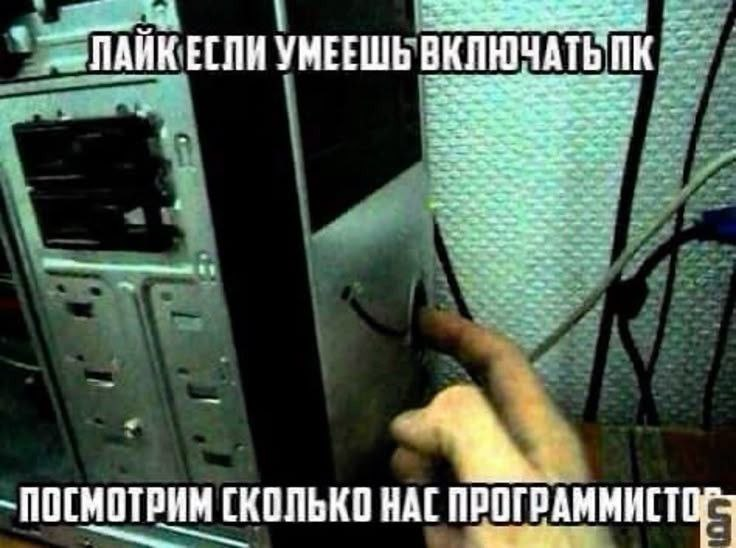

не знаю, в чем секрет счастья, но когда я делала иад....


### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [36]:
def otzig(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss,
    n_iterations: int = 1000,
    temp_init: float = 1.0,
    step: float = 1.0
):
    """
    Функция имитации отжига

    :param w_init: np.ndarray размера (n_features,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать loss.calc_loss(X, y, w)
    :param n_iterations: int - сколько итераций делать
    :param temp_init: float - начальная температура
    :param step: float - размер шага
    :return: (лучшие веса, список лоссов по итерациям)
    """

    w = w_init.copy()
    best_w = w.copy()
    best_loss = loss.calc_loss(X, y, best_w)
    losses = [best_loss]
    res = [w.copy()]


    curr_w, curr_loss = best_w.copy(), best_loss

    for i in range(n_iterations):
        new_w = curr_w + step * np.random.standard_t(df=3, size=curr_w.shape)
        new_loss = loss.calc_loss(X, y, new_w)

        if new_loss < best_loss:
            best_w, best_loss = new_w.copy(), new_loss

        delta = new_loss - curr_loss
        temp = temp_init / (i + 1)

        if temp > 1e-9:
            p = np.exp(-delta / temp)
        else:
            p = 0.0

        if delta < 0 or np.random.rand() < p:
            curr_w, curr_loss = new_w.copy(), new_loss

        res.append(curr_w.copy())


    return best_w, losses, res

In [37]:
np.random.seed(58)

w_init = np.random.randn(X_train_n.shape[1])
loss = HuberLoss(eps=1)


n_iterations = 1000
temp_init = 1.0
step = 1.0


best_w_otzig, losses_otzig, res_otzig = otzig(w_init, X_train_n, y_train, loss, n_iterations, temp_init, step)


lr = 0.01
w_gd = gradient_descent(w_init, X_train_n, y_train, loss, lr, n_iterations)


y_train_pred_otzig = np.dot(X_train_n, best_w_otzig)
y_test_pred_otzig = np.dot(X_test_n, best_w_otzig)

y_train_pred_gd = np.dot(X_train_n, w_gd[-1])
y_test_pred_gd = np.dot(X_test_n, w_gd[-1])

mse_train_otzig = mean_squared_error(y_train, y_train_pred_otzig)
mse_test_otzig = mean_squared_error(y_test, y_test_pred_otzig)

mse_train_gd = mean_squared_error(y_train, y_train_pred_gd)
mse_test_gd = mean_squared_error(y_test, y_test_pred_gd)

print(f'Имитация отжига: Train MSE = {mse_train_otzig:.4f}, Test MSE = {mse_test_otzig:.4f}')
print(f'Градиентный спуск: Train MSE = {mse_train_gd:.4f}, Test MSE = {mse_test_gd:.4f}')


Имитация отжига: Train MSE = 228638799.2233, Test MSE = 252222064.1444
Градиентный спуск: Train MSE = 229981723.6042, Test MSE = 254074930.3771


MSE на тесет в имитации отжига вышло больше, а на трейне - меньше

In [38]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


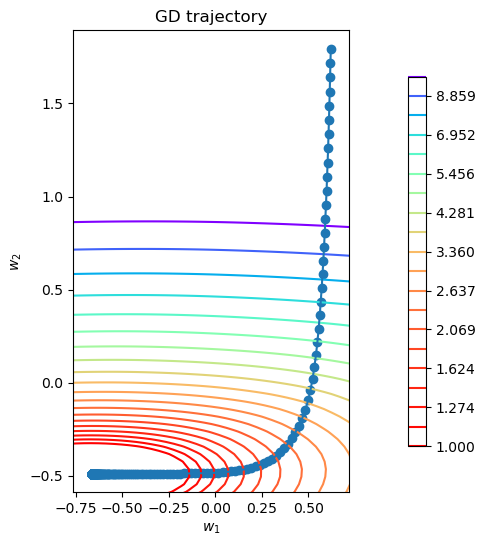

In [39]:
trac = gradient_descent(w_init, X, y, loss, 0.01, 1000)
plot_gd(trac, X, y, loss)

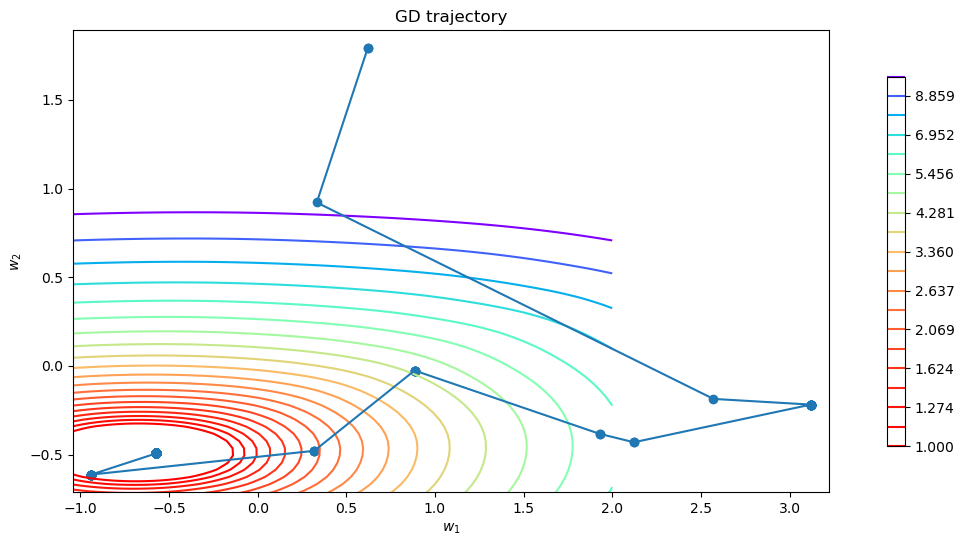

In [40]:
best_w_otzig, losses_otzig, res_otzig = otzig(w_init, X, y, loss, 1000, temp_init, step)
plot_gd(res_otzig, X, y, loss)

Траектория имитации отжига намного хаотичнее траектории градиентного спуска, она сильно колеблется.